# **Titanic Survival Prediction.**

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection & Processing

In [ ]:
titanic_data=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
#Printing the first 5 rows in the data
print("First 5 rows of the dataset:")
print(titanic_data.head())

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Titanic Dataset Column Descriptions:
Survived → Target variable (1 = Survived, 0 = Not Survived)

Pclass → Passenger class (1 = First, 2 = Second, 3 = Third)

Sex → Gender (Male/Female)

Age → Age of passenger

SibSp → Number of siblings/spouses aboard

Parch → Number of parents/children aboard

Fare → Ticket price

Embarked → Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) t**** *italicized text

In [ ]:
print(titanic_data.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Printing the no. of rows and colums in the dataset
print(titanic_data.shape)

(891, 11)


In [ ]:
#Getting info about the dataset
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB
None


In [ ]:
#Getting some statistical data
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.699118   
std     257.353842    0.486592    0.836071    0.477990   13.002015   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   29.699118   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.361392  
std      1.102743    0.806057   49.693429    0.635673  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    0.000000  
50%      0.000000    0.000000   1

In [ ]:
# Checking for missing values
print("\nMissing values in dataset:")
print(titanic_data.isnull().sum())


Missing values in dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Handling Missing Data

In [ ]:
#Drop column "Cabin"
#Too many missing values
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [ ]:
#Filling missing 'Age' values with the mean of the column
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [ ]:
# Filling missing 'Embarked' values with the mode of the column
print(titanic_data["Embarked"].mode()[0])
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

S


In [ ]:
#Checking again for Missing values in Dataset
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Finding the Number of People "SURVIVED" and "NOT SURVIVED"
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
#Finding the Number of People "SURVIVED" and "NOT SURVIVED"
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


Encoding the Categorical Columns

In [ ]:
# Mapping 'Sex' column to 0 for male and 1 for female
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})


In [ ]:
# Mapping 'Embarked' column to numerical values (S=0, C=1, Q=2)
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [ ]:
#Check if survival classes are imbalanced
print(titanic_data['Survived'].value_counts(normalize=True))


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)


# Seperating features and Target

In [ ]:
  # Droping the following data
x=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=titanic_data['Survived']
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Spliting the data in Training data and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
# Printing the shapes of the datasets
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


# Model Training:-Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
# Train (fit) the model on training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation :-Accuracy Score

In [ ]:
# Accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.8089887640449438


In [ ]:
# Accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7821229050279329


# Data Visualization

<ipython-input-26-ec7a294d7bcf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data, palette="viridis")


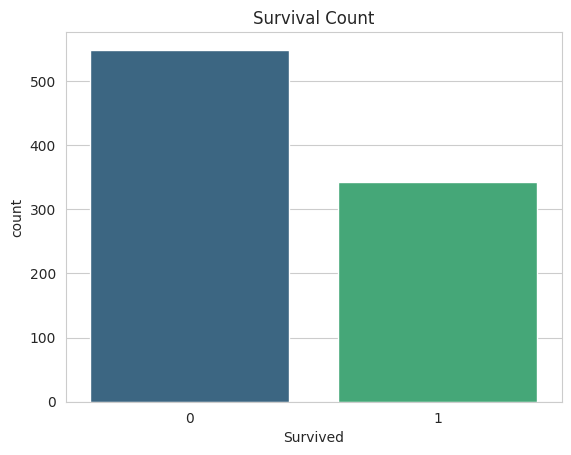

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', data=titanic_data, palette="viridis")
plt.title("Survival Count")
plt.show()

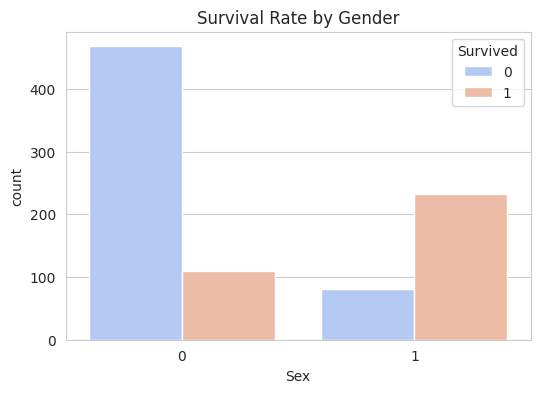

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.show()

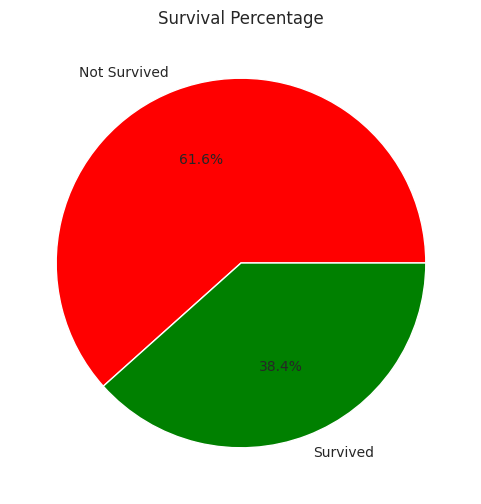

In [ ]:
# Pie Chart for Survival Distribution
plt.figure(figsize=(6,6))
titanic_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'green'], labels=['Not Survived', 'Survived'])
plt.title("Survival Percentage")
plt.ylabel("")  # Hide y-label
plt.show()

<ipython-input-29-4066ddb4d4da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=titanic_data, palette="magma")


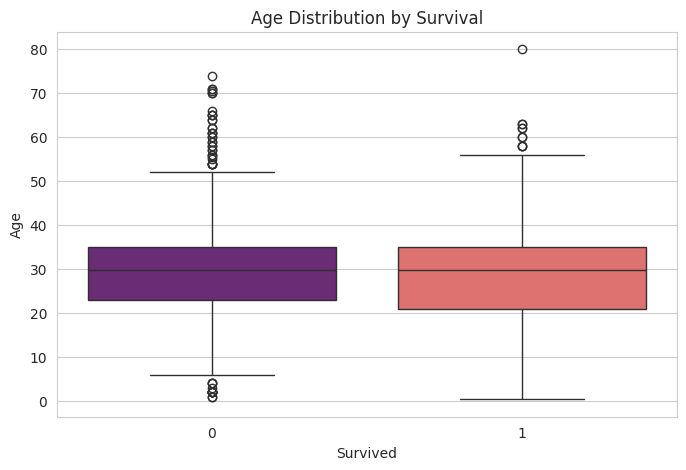

In [ ]:
#Box Plot for Age vs. Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=titanic_data, palette="magma")
plt.title("Age Distribution by Survival")
plt.show()

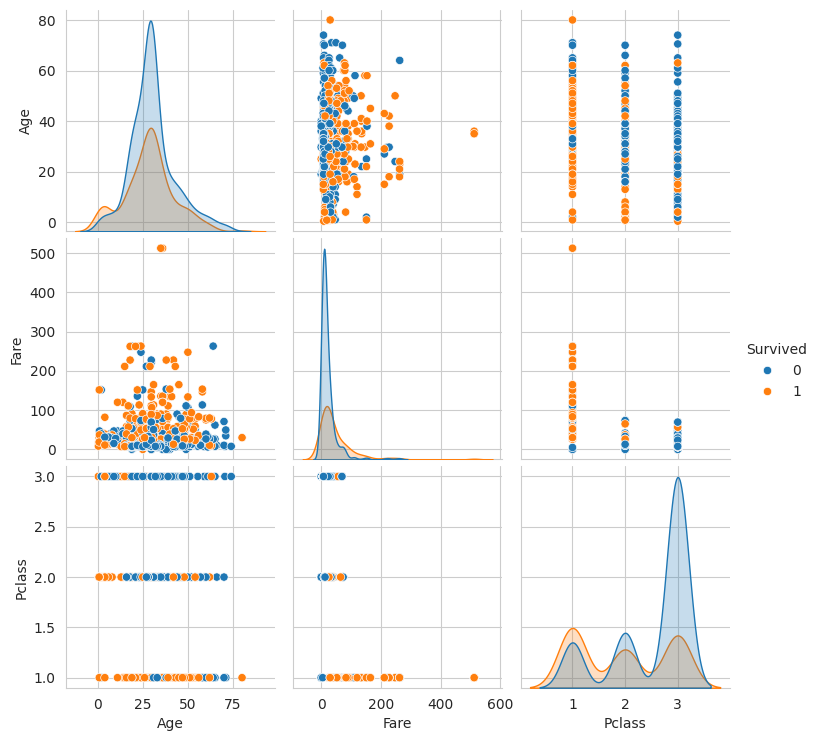

In [ ]:
# Pair Plot for Feature Relationships
sns.pairplot(titanic_data[['Age', 'Fare', 'Pclass', 'Survived']], hue="Survived")
plt.show()

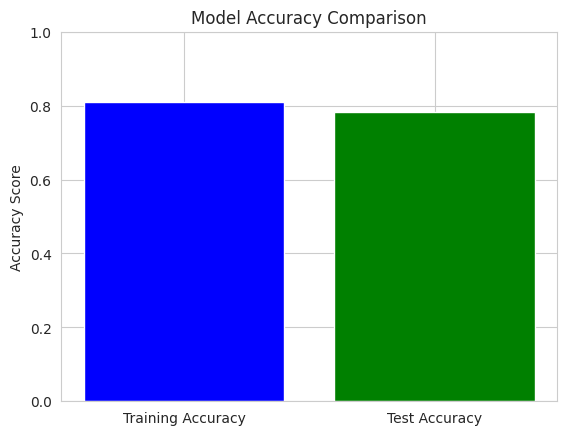

In [ ]:
#Bar Chart for Accuracy Comparison
plt.bar(["Training Accuracy", "Test Accuracy"], [training_data_accuracy, test_data_accuracy], color=['blue', 'green']) # Changed variable names to training_data_accuracy and test_data_accuracy
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.show()

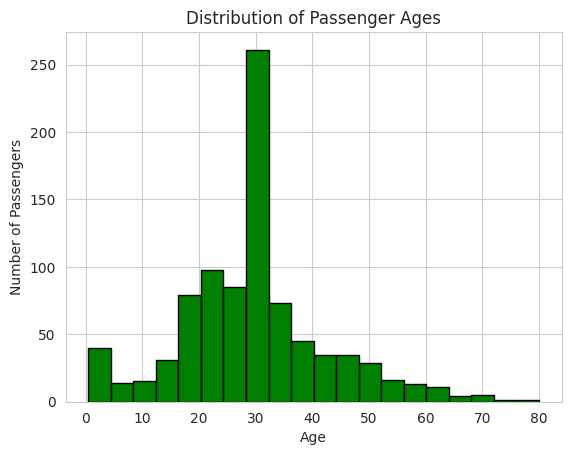

In [ ]:
# Histogram of Passenger Ages
plt.hist(titanic_data["Age"].dropna(), bins=20, color='Green', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passenger Ages")
plt.show()

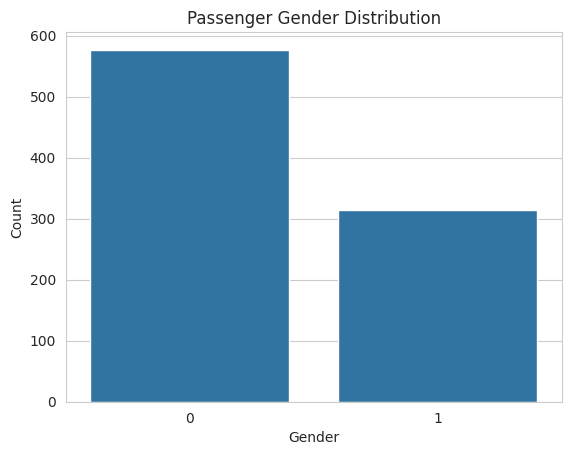

In [ ]:
#Countplot for Gender Distribution
sns.countplot(x=titanic_data["Sex"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Passenger Gender Distribution")
plt.show()

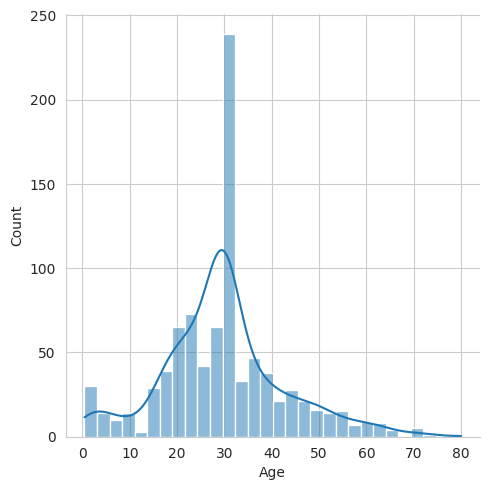

In [ ]:
sns.displot(titanic_data['Age'],kde=True)

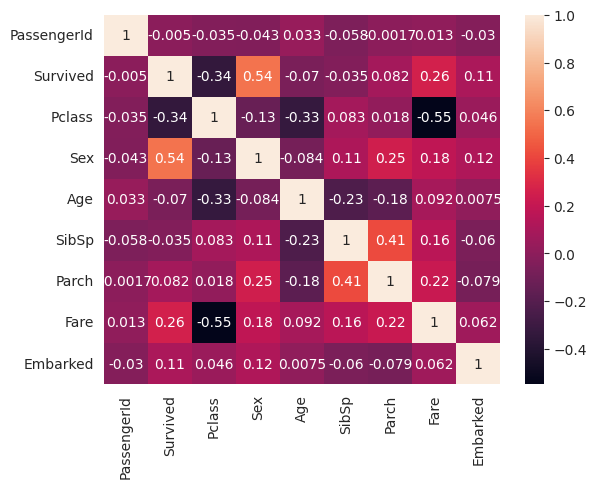

In [ ]:
# Selecting only numerical features for correlation analysis
numerical_features = titanic_data.select_dtypes(include=np.number)

# Generating the heatmap using the numerical features
sns.heatmap(numerical_features.corr(), annot=True)
plt.show()

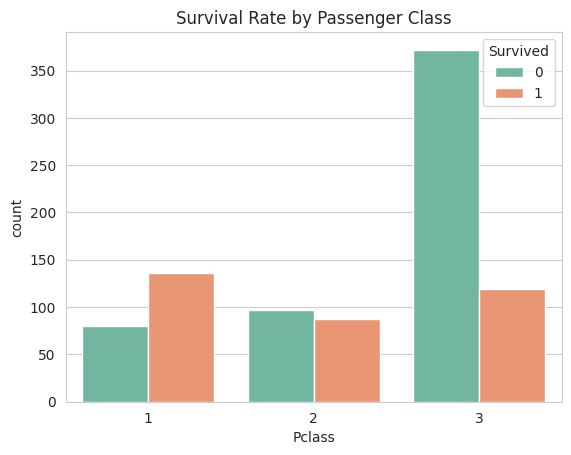

In [ ]:
#Survived by Passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette="Set2")
plt.title("Survival Rate by Passenger Class")
plt.show()

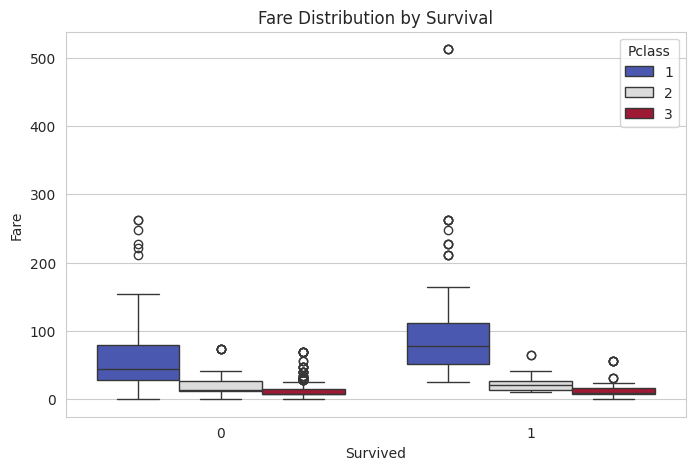

In [ ]:
#Fare distribution by Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=titanic_data,hue="Pclass", palette="coolwarm")
plt.title("Fare Distribution by Survival")
plt.show()

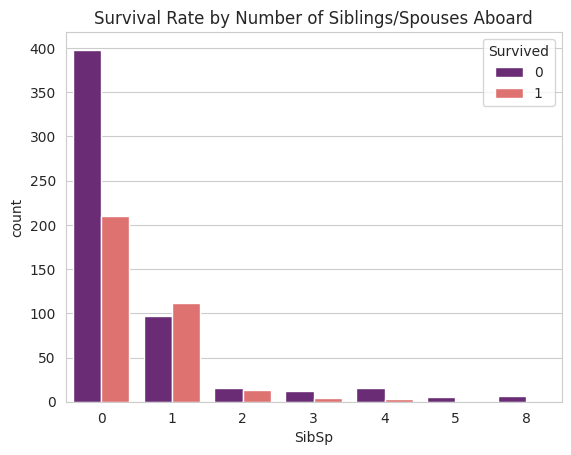

In [ ]:
#Siblings/Spouses vs survival
sns.countplot(x='SibSp', hue='Survived', data=titanic_data, palette="magma")
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")
plt.show()